In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from  sklearn.datasets import load_iris

In [11]:
data=load_iris()

In [12]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [13]:
da=data.data

In [14]:
dat=pd.DataFrame(da,columns=data.feature_names)

In [15]:
dat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
df=dat[['petal length (cm)','petal width (cm)']]

In [17]:
df


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


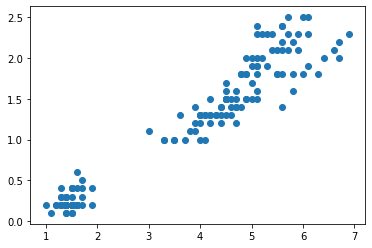

In [20]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
df=MinMaxScaler().fit(df).transform(df)

In [25]:
from sklearn.cluster import KMeans 

In [53]:
model=KMeans(n_clusters=3)

In [54]:
y_pred=model.fit_predict(df)

In [55]:
type(y_pred)

numpy.ndarray

In [56]:
type(df)

pandas.core.frame.DataFrame

In [57]:
df=pd.DataFrame(df,columns=['petal length','petal width'])

In [58]:
df['y_pred']=y_pred


In [59]:
df


,petal length,petal width,y_pred
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [60]:
df1=df[df['y_pred']==0]
df2=df[df['y_pred']==1]
df3=df[df['y_pred']==2]

In [61]:
df1.head()


,petal length,petal width,y_pred
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


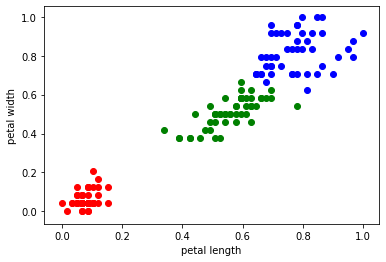

In [62]:
plt.scatter(df1['petal length'],df1['petal width'],color='red')
plt.scatter(df2['petal length'],df2['petal width'],color='blue')
plt.scatter(df3['petal length'],df3['petal width'],color='green')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

In [63]:
rang=range(1,11)
lst=list()

In [64]:
for k in rang:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length','petal width']])
    lst.append(km.inertia_)

In [65]:
lst

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667126,
 0.8535683225340073,
 0.6798101576314028,
 0.5656776810037092,
 0.48580845539143697,
 0.4154845785171637,
 0.3645931693583604]

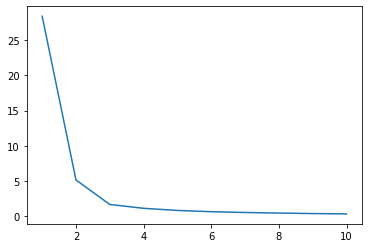

In [66]:
plt.plot(rang,lst)